# Lab 03 - Inteligencja roju

## Zadanie wstępne 

Użyjemy paczki pyswarms (https://pyswarms.readthedocs.io/en/latest/index.html), by
uruchomić algorytm Particle Swarm Optimizer do wyszukiwania minimum funkcji
sferycznej, która ma minimum 0 we współrzędnych (0,0) – patrz rysunki.

2023-11-04 08:23:09,208 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=8.55e-12
2023-11-04 08:23:09,270 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.550924753573215e-12, best pos: [ 1.73677082e-06 -2.35256283e-06]
/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


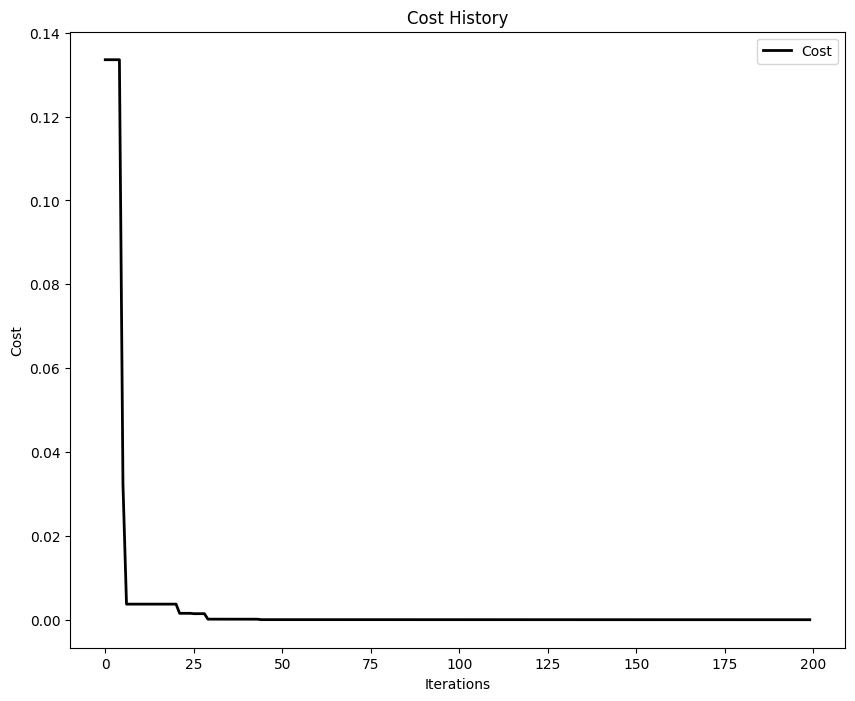

In [1]:
# Import modules
import numpy as np
from matplotlib import pyplot as plt

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history

# Set-up hyperparameters
options = {"c1": 0.5, "c2": 0.3, "w": 0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=200)
# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history
# Plot!
plot_cost_history(cost_history)
plt.show()

## Zadanie wstępne dla chętnych (z wykładu)

Ściągnij plik pso-animation.py, który tworzy animację poruszającego się roju. Uruchom
go. Sprawdź czy modyfikacja parametrów c1, c2, w wpływa na zachowanie roju.

Uwaga 1! Żeby zapisywać plik gif użyłem narzędzia ImageMagick do tworzenia gifów.
Musiałem zainstalować na komputerze:
https://imagemagick.org/script/download.php#windows

Uwaga 2! Niestety rysowanie i animacje w pyswarms nie są kompatybilne z
najnowszym matplotlibem (>3.4). Zainstaluj starszą wersję matplotliba, np. wpisując
w terminalu: pip install matplotlib==3.3.4

2023-11-04 08:21:12,798 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=0.00954
2023-11-04 08:21:12,812 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.009538830215498856, best pos: [0.06864403 0.06947537]
2023-11-04 08:21:14,186 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-11-04 08:21:14,187 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
/var/folders/zz/c0s_cwks7r3c_5h639y438n80000gn/T/ipykernel_92468/2916991298.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  animation.save("plot0.gif", writer="imagemagick", fps=10)
/var/folders/zz/c0s_cwks7r3c_5h639y438n80000gn/T/ipykernel_92468/2916991298.py:12: MatplotlibDeprecation

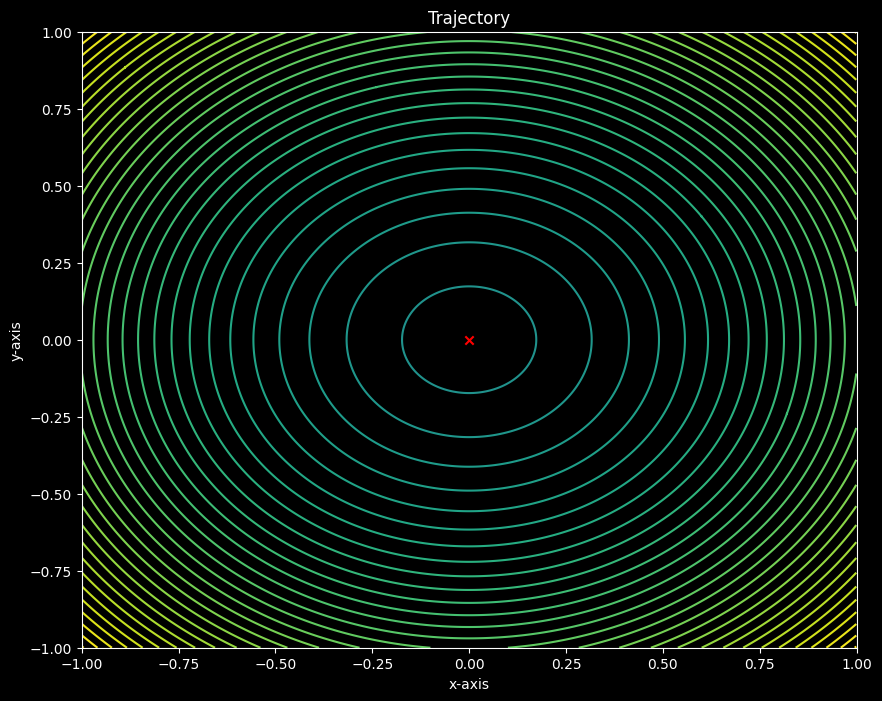

In [28]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters.plotters import plot_contour
from pyswarms.utils.plotters.formatters import Mesher

options = {"c1": 0.5, "c2": 0.3, "w": 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=50)
# tworzenie animacji
m = Mesher(func=fx.sphere)
animation = plot_contour(pos_history=optimizer.pos_history, mesher=m, mark=(0, 0))
animation.save("plot0.gif", writer="imagemagick", fps=10)

W pewnym zakładzie badawczym inżynierowie próbowali stworzyć bardzo trwały stop
sześciu metali. Ilości wszystkich 6 metali w stopie oznaczone zostały symbolami x, y, z,
u, v, w i są to liczby z przedziału [0, 1). Okazało się, że wytrzymałość stopu określona
jest przez funkcję:

𝑒𝑛𝑑𝑢𝑟𝑎𝑛𝑐𝑒(𝑥, 𝑦, 𝑧, 𝑣, 𝑢, 𝑤) = 𝑒^−2∙(𝑦−sin (𝑥))^2+ sin(𝑧 ∙ 𝑢) + cos (𝑣 ∙ 𝑤)

def endurance(x, y, z, u, v, w):
 return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

Obliczenie maksymalnej wytrzymałości (endurance) było dla inżynierów problematyczne. Poproszono Ciebie, eksperta od sztucznej inteligencji, o rozwiązanie problemu.

Problem ten miał chromosomy zmiennoprzecinkowe (liczby rzeczywiste z przedziału
[0,1)). Rozwiążemy ten problem za pomocą PSO.

## Zadanie 1

Użyjemy paczki pyswarms, by uruchomić algorytm Particle Swarm Optimizer do
wyszukania maksimum funkcji Endurance, z problemu inżynieryjnego.

a) Rzucimy okiem na tutorial o podstawowej optymalizacji:
https://pyswarms.readthedocs.io/en/latest/examples/tutorials/basic_optimization.html#Optimizing-a-function i wykorzystajmy ją na początek do minimalizacji funkcji Sphere.

In [29]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

options = {"c1": 0.5, "c2": 0.3, "w": 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=1000)

2023-11-04 08:21:17,238 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.25e-40
2023-11-04 08:21:17,603 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.253258388224641e-40, best pos: [9.44782233e-22 1.49810956e-20]


(2.253258388224641e-40, array([9.44782233e-22, 1.49810956e-20]))

b) Spróbujmy teraz dodać ograniczenia dla dziedziny (obszaru), w którym szukamy
minimum. Trzeba ustalić ograniczenie górne i dolne dla wszystkich zmiennych,
weźmy minimum 1, maksimum 2 – dla wszystkich zmiennych.

In [30]:
x_max = [2, 2]
x_min = [1, 1]
my_bounds = (x_min, x_max)
optimizer = ps.single.GlobalBestPSO(
    n_particles=10, dimensions=2, options=options, bounds=my_bounds
)
optimizer.optimize(fx.sphere, iters=1000)

2023-11-04 08:21:17,612 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.04
2023-11-04 08:21:18,066 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.03766257206549, best pos: [1.01423597 1.00448393]


(2.03766257206549, array([1.01423597, 1.00448393]))

## Stopy metali

2023-11-04 08:23:34,713 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-3 
2023-11-04 08:23:34,740 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.999999443979474, best pos: [ 0.90806339  0.78813256  1.58707165 -0.00412613  0.98927471 -0.15773814]


Koszt: -2.999999443979474
Stopy metali: [ 0.90806339  0.78813256  1.58707165 -0.00412613  0.98927471 -0.15773814]


/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/PycharmProjects/IO_labs/v

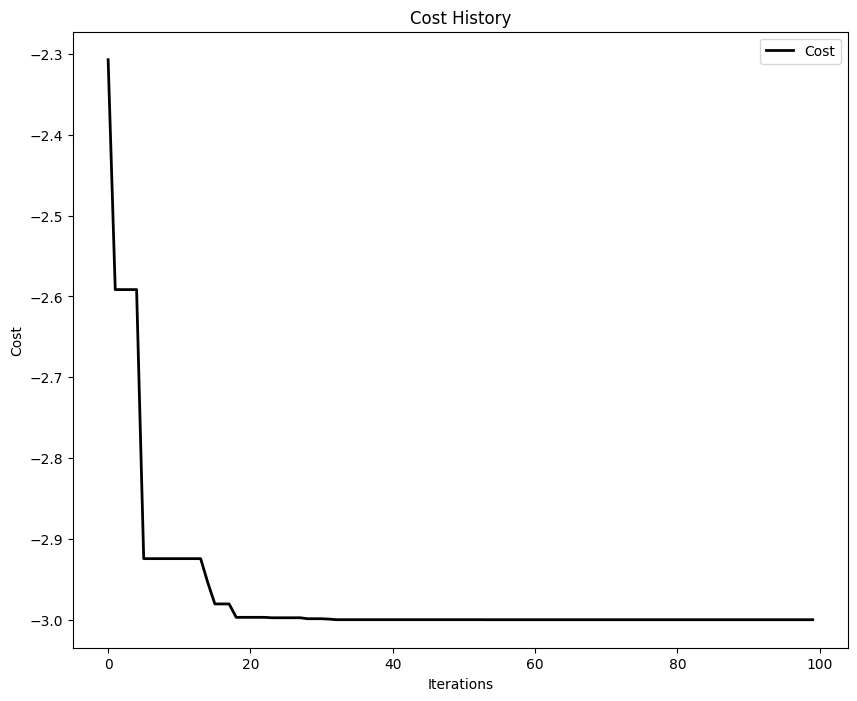

In [3]:
x_max = np.ones(6)
x_min = np.zeros(6)
bounds = (x_min, x_max)

import math


def endurance(x: list[float]):
    return -(
        math.exp(-2 * (x[1] - math.sin(x[0])) ** 2)
        + math.sin(x[2] * x[4])
        + math.cos(x[3] * x[5])
    )


def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)


options = {"c1": 0.5, "c2": 0.3, "w": 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options)
cost, pos = optimizer.optimize(f, iters=100)

print(f"Koszt: {cost}")
print(f"Stopy metali: {pos}")

from pyswarms.utils.plotters.plotters import plot_cost_history
import matplotlib.pyplot as plt

cost_history = optimizer.cost_history

# Plot!
plot_cost_history(cost_history)
plt.show()

## Zadanie 2

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/PycharmProjects/IO_labs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/PycharmProjects/IO_labs/v

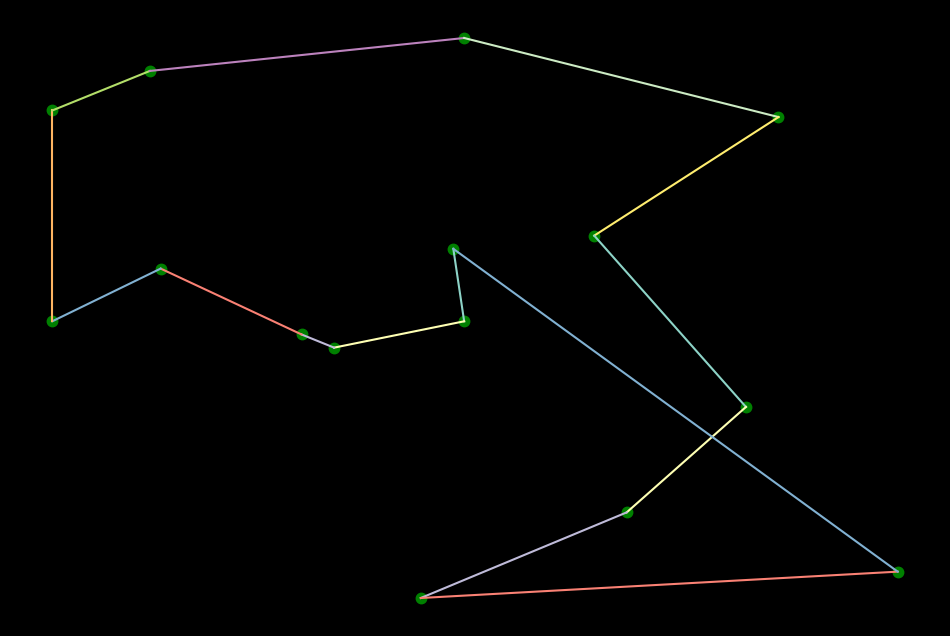

In [5]:
import matplotlib.pyplot as plt
import random

from aco import AntColony


plt.style.use("dark_background")


COORDS = (
    (20, 52),
    (43, 50),
    (20, 84),
    (70, 65),
    (29, 90),
    (87, 83),
    (73, 23),
    (57, 63),
    (98, 14),
    (84, 39),
    (58, 52),
    (30, 60),
    (58, 95),
    (46, 48),
    (54, 10),
)


def random_coord():
    return random.randint(0, len(COORDS))

def plot_nodes(w=12, h=8):
    for x, y in COORDS:
        plt.plot(x, y, "g.", markersize=15)
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])


def plot_all_edges():
    paths = ((a, b) for a in COORDS for b in COORDS)

    for a, b in paths:
        plt.plot((a[0], b[0]), (a[1], b[1]))


plot_nodes()

colony = AntColony(
    COORDS,
    ant_count=100,
    alpha=0.5,
    beta=1.2,
    pheromone_evaporation_rate=0.40,
    pheromone_constant=1000.0,
    iterations=100,
)

optimal_nodes = colony.get_path()

for i in range(len(optimal_nodes) - 1):
    plt.plot(
        (optimal_nodes[i][0], optimal_nodes[i + 1][0]),
        (optimal_nodes[i][1], optimal_nodes[i + 1][1]),
    )

plt.show()


In [6]:
def test_params():
    result = {}
    for i in range(20):
        colony = AntColony(
            COORDS,
            ant_count=random.randint(10, 100),
            alpha=random.uniform(0.1, 1.0),
            beta=random.uniform(0.1, 1.8),
            pheromone_evaporation_rate=random.uniform(0.1, 0.9),
            pheromone_constant=1000.0,
            iterations=100,
        )
        print(f"Parametry: ant_count={colony.ant_count}, alpha={colony.alpha}, beta={colony.beta}, pheromone_evaporation_rate={colony.pheromone_evaporation_rate}")
        result[colony.bestDistance] = {
            "ant_count": colony.ant_count,
            "alpha": colony.alpha,
            "beta": colony.beta,
            "pheromone_evaporation_rate": colony.pheromone_evaporation_rate}
    print(sorted(result.items()))

test_params()

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

Najlepsze wyniki (najmniejsza odległość) uzyskano dla: 
- jak najmniejszego 'pheromone_evaporation_rate' (0.177), odległość maleje przy malejącym współczynniku
- średniego 'beta', środek przedziału (0.1, 1.8) (0.69), odl. maleje przy malejącym współczynniku
- brak trendu dla alpha